# 第5章原始程式碼

In [1]:
#program 5.1a Define classical oracle f1 and test it
def f1(x):
  return '1'
print(f1('000'),f1('001'),f1('010'),f1('011'),f1('100'),f1('101'),f1('110'),f1('111'))

1 1 1 1 1 1 1 1


In [2]:
#program 5.1b Define classical oracle f2 and test it
def f2(x):
  if x[0]=='0':
    return '0'
  else:
    return '1'
print(f2('000'),f2('001'),f2('010'),f2('011'),f2('100'),f2('101'),f2('110'),f2('111'))

0 0 0 0 1 1 1 1


In [3]:
#Program 5.1c Solve constant-balanced function decision (CBFD) prob. with classical code
import itertools
def cbfd_test(f,n):
  count0=count1=0
  iter = itertools.product([0,1], repeat=n)
  lst = [''.join(map(str, item)) for item in iter]
  for s in lst:
    if f(s)=='0':      
      count0+=1
    else:        
      count1+=1
    if count0>0 and count1>0:
      return True  #for balanced function
    elif count0>2**(n-1) or count1>2**(n-1):
      return False #for constant function
print(cbfd_test(f1,3))
print(cdfd_test(f2,3))

False
True


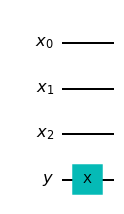

In [4]:
#Program 5.2 Define a quantum oracle
from qiskit import QuantumRegister,QuantumCircuit
qrx = QuantumRegister(3,'x')
qry = QuantumRegister(1,'y')
qc = QuantumCircuit(qrx,qry)
qc.x(qry)
qc.draw('mpl')

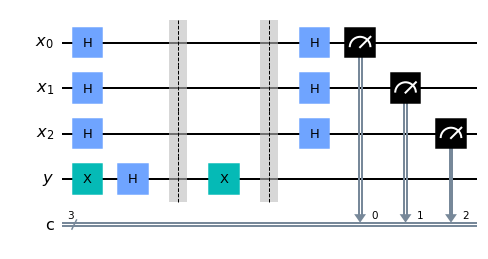

In [5]:
#Program 5.3a Build quantum circuit of Deutsch-Jozsa alg.
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit
qrx = QuantumRegister(3,'x')
qry = QuantumRegister(1,'y')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(qrx,qry,cr)
qc.h(qrx)
qc.x(qry)
qc.h(qry)
qc.barrier()
qc.x(qry)
qc.barrier()
qc.h(qrx)
qc.measure(qrx,cr)
qc.draw('mpl')

Counts: {'000': 1000}


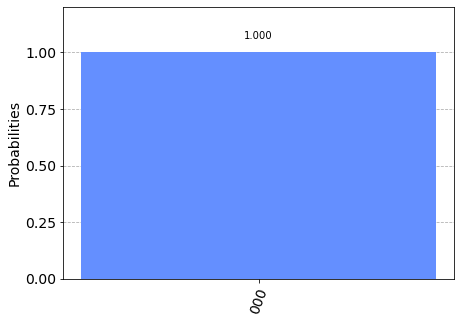

In [6]:
#Program 5.3b Run Deutsch-Jozsa alg. with simulator
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

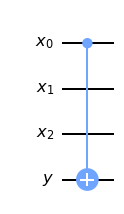

In [7]:
#Program 5.4 Define another quantum oracle
from qiskit import QuantumRegister,QuantumCircuit
qrx = QuantumRegister(3,'x')
qry = QuantumRegister(1,'y')
qc = QuantumCircuit(qrx,qry)
qc.cx(qrx[0],qry)
qc.draw('mpl')

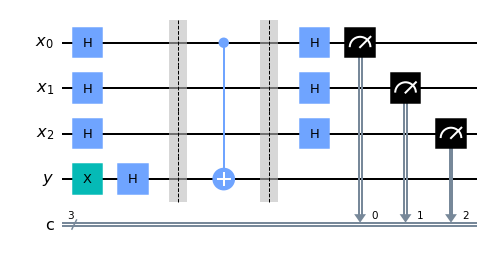

In [8]:
#Program 5.5a Build quantum circuit of Deutsch-Jozsa alg.
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit
qrx = QuantumRegister(3,'x')
qry = QuantumRegister(1,'y')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(qrx,qry,cr)
qc.h(qrx)
qc.x(qry)
qc.h(qry)
qc.barrier()
qc.cx(qrx[0],qry)
qc.barrier()
qc.h(qrx)
qc.measure(qrx,cr)
qc.draw('mpl')

Counts: {'001': 1000}


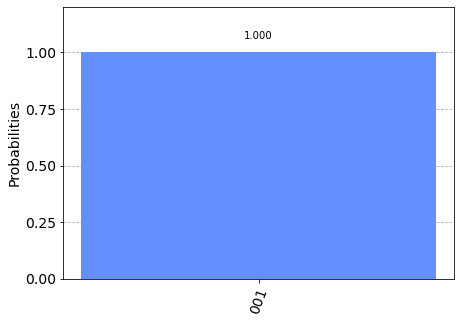

In [9]:
#Program 5.5b Run Deutsch-Jozsa alg. with simulator
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

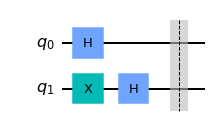

<IPython.core.display.Latex object>

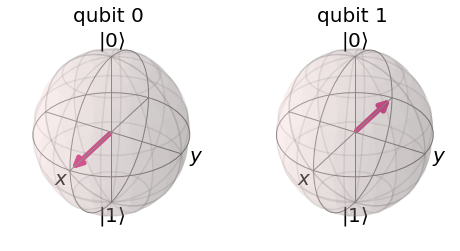

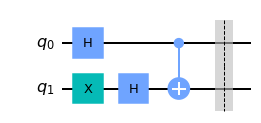

<IPython.core.display.Latex object>

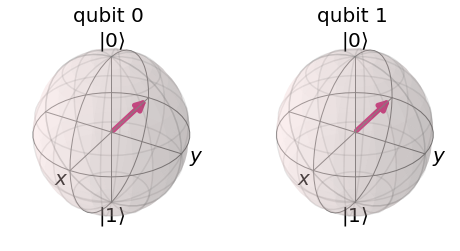

In [10]:
#Program 5.6 Show phase kickback of CNOT gate
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import array_to_latex, plot_bloch_multivector 
sim = Aer.get_backend('aer_simulator')
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.x(1)
qc1.h(1)
qc1.save_statevector()
state1 = sim.run(qc1).result().get_statevector()
display(qc1.draw('mpl'))
display(array_to_latex(state1, prefix='\\text{Statevector before CNOT gate: }'))
display(plot_bloch_multivector(state1))
print('='*60)
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.x(1)
qc2.h(1)
qc2.cx(0,1)
qc2.save_statevector()
state2 = sim.run(qc2).result().get_statevector()
display(qc2.draw('mpl'))
display(array_to_latex(state2, prefix='\\text{Statevector after CNOT gate: }'))
display(plot_bloch_multivector(state2))

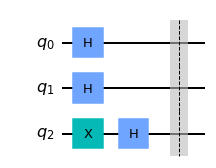

<IPython.core.display.Latex object>

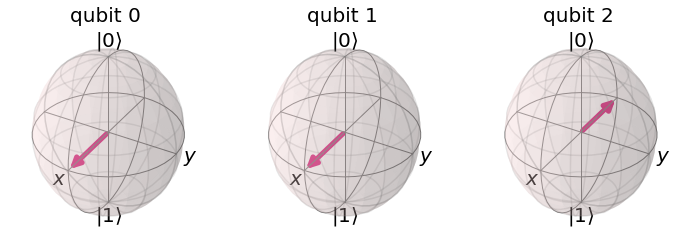

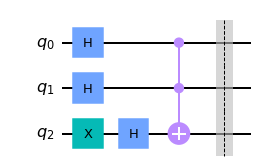

<IPython.core.display.Latex object>

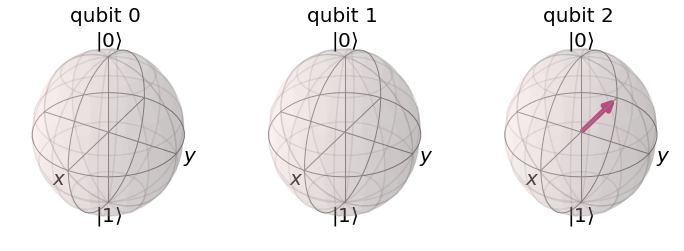

In [11]:
# Program 5.7 Show phase kickback of CCNOT gate
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import array_to_latex, plot_bloch_multivector
sim = Aer.get_backend('aer_simulator')
qc1 = QuantumCircuit(3)
qc1.h([0,1])
qc1.x(2)
qc1.h(2)
qc1.save_statevector()
state1 = sim.run(qc1).result().get_statevector()
display(qc1.draw('mpl'))
display(array_to_latex(state1, prefix="\\text{Statevector before CCNOT gate: }"))
display(plot_bloch_multivector(state1))
print('='*80)
qc2 = QuantumCircuit(3)
qc2.h([0,1])
qc2.x(2)
qc2.h(2)
qc2.ccx(0,1,2)
qc2.save_statevector()
state2 = sim.run(qc2).result().get_statevector()
display(qc2.draw('mpl'))
display(array_to_latex(state2, prefix="\\text{Statevector before CCNOT gate: }"))
display(plot_bloch_multivector(state2))

CZ Gate (q0 as control bit, q1 as target bit):


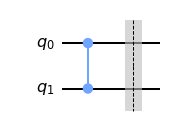

<IPython.core.display.Latex object>

CZ Gate (q1 as control bit, q0 as target bit):


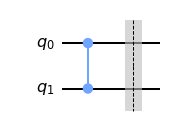

<IPython.core.display.Latex object>

In [12]:
#Program 5.8 Show circuit containing CZ gate and CZ gate's unitary matrix
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import array_to_latex
sim = Aer.get_backend('aer_simulator')
qc1 = QuantumCircuit(2)
qc1.cz(0,1)
qc1.save_unitary()
unitary1 = sim.run(qc1).result().get_unitary()
print("CZ Gate (q0 as control bit, q1 as target bit):")
display(qc1.draw('mpl'))
display(array_to_latex(unitary1, prefix="\\text{Unitray Matrix of CZ Gate (MSB as Target): }"))
print('='*60)  
qc2 = QuantumCircuit(2)
qc2.cz(1,0)
qc2.save_unitary()
unitary2 = sim.run(qc2).result().get_unitary()
print("CZ Gate (q1 as control bit, q0 as target bit):")
display(qc2.draw('mpl'))
display(array_to_latex(unitary2, prefix="\\text{Unitray Matrix of CZ Gate (LSB as Target): }"))

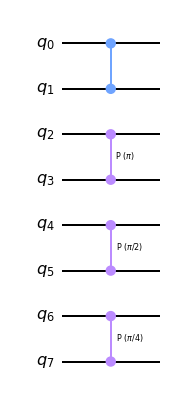

In [13]:
#Program 5.9 Show quantum circuit with CZ, CP, CS, CT gates
from qiskit import QuantumCircuit
from math import pi
qc = QuantumCircuit(8)
qc.cz(0,1)
qc.cp(pi,2,3)
qc.cp(pi/2,4,5)
qc.cp(pi/4,6,7)
display(qc.draw('mpl'))